In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/data_.zip', 'r') as zip_ref:
    zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/sardin.zip', 'r') as zip_ref:
#     zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/chandana.zip', 'r') as zip_ref:
#     zip_ref.extractall('')

**Importing the Dependencies**

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
Ilish_pic= os.listdir('ilish')
print(Ilish_pic[0:5])
print(Ilish_pic[-5:])

print()

['6373.webp', '5810.webp', '1162.webp', '3737.webp', '5992.webp']
['6713.webp', '6762.webp', '3880.webp', '131.webp', '4243.webp']



In [5]:
Sardin_pic= os.listdir('sardin')

In [6]:
Chandana_pic= os.listdir('chandana')

In [7]:
print('Ilish images:', len(Ilish_pic))
print('Sardin images:', len(Sardin_pic))
print('Chandana images:', len(Chandana_pic))

Ilish images: 7000
Sardin images: 7000
Chandana images: 7000


**Creating Labels for the two class of Images**

Ilish  -->   0

Sardin  -->  1

Chandana --> 2

In [8]:
# create the labels

Ilish_labels = [0]*5000

Sardin_labels = [1]*5000

Chandana_labels = [2]*5000

In [9]:
print(Ilish_labels[0:5])

print(Sardin_labels[0:5])

print(Chandana_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]


In [10]:
print(len(Ilish_labels))
print(len(Sardin_labels))
print(len(Chandana_labels))

5000
5000
5000


In [11]:
labels = Ilish_labels + Sardin_labels + Chandana_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

15000
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2]


**Displaying the Images**

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [12]:
import numpy as np
import random
from PIL import Image

# Parameters
image_number = 5000  # Number of images to select from each type

# Initialize the list to store the images
data = []

# Process ilish images
ilish_path = 'ilish/'
Ilish_pic = sorted(os.listdir(ilish_path))  # Make sure the images are in order
random.shuffle(Ilish_pic)  # Shuffle images to get random ones
for img_file in Ilish_pic[:image_number]:
    image = Image.open(ilish_path + img_file)
    image = image.resize((224, 224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process sardin images
sardin_path = 'sardin/'
Sardin_pic = sorted(os.listdir(sardin_path))  # Make sure the images are in order
random.shuffle(Sardin_pic)  # Shuffle images to get random ones
for img_file in Sardin_pic[:image_number]:
    image = Image.open(sardin_path + img_file)
    image = image.resize((224, 224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process chandana images
chandana_path = 'chandana/'
Chandana_pic = sorted(os.listdir(chandana_path))  # Make sure the images are in order
random.shuffle(Chandana_pic)  # Shuffle images to get random ones
for img_file in Chandana_pic[:image_number]:
    image = Image.open(chandana_path + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Now, `data` contains 4000 random images from each type, for a total of 12,000 images.

In [13]:
# Convert labels to numpy array for easy processing
labels = np.array(labels)

# Count the number of images in each class
unique, counts = np.unique(labels, return_counts=True)

# Print the number of images for each class
class_counts = dict(zip(unique, counts))
print(f"Class counts: {class_counts}")

Class counts: {0: 5000, 1: 5000, 2: 5000}


array([[[152, 152, 150],
        [156, 152, 149],
        [158, 155, 151],
        ...,
        [152, 153, 155],
        [133, 137, 138],
        [142, 146, 147]],

       [[160, 158, 156],
        [156, 152, 151],
        [171, 167, 164],
        ...,
        [130, 131, 133],
        [140, 144, 143],
        [137, 137, 137]],

       [[145, 144, 142],
        [156, 155, 153],
        [153, 152, 150],
        ...,
        [142, 140, 141],
        [147, 147, 147],
        [122, 118, 115]],

       ...,

       [[194, 194, 185],
        [181, 178, 171],
        [189, 189, 181],
        ...,
        [ 38,  32,  20],
        [ 50,  44,  32],
        [ 50,  42,  32]],

       [[135, 132, 123],
        [136, 133, 124],
        [148, 145, 138],
        ...,
        [ 44,  36,  25],
        [ 51,  43,  32],
        [ 46,  38,  27]],

       [[182, 179, 170],
        [188, 185, 180],
        [194, 193, 188],
        ...,
        [ 44,  36,  25],
        [ 41,  32,  23],
        [ 44,  34,  24]]], dtype=uint8)
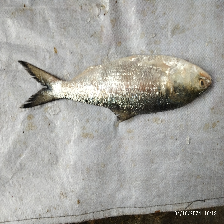

In [14]:
data[50]

In [15]:
type(data)

list

In [16]:
len(data)

15000

array([[[190, 193, 195],
        [189, 192, 193],
        [189, 192, 193],
        ...,
        [172, 170, 172],
        [173, 171, 173],
        [174, 172, 175]],

       [[188, 191, 192],
        [189, 191, 193],
        [188, 191, 193],
        ...,
        [172, 171, 173],
        [174, 173, 176],
        [172, 171, 174]],

       [[190, 193, 195],
        [192, 195, 197],
        [190, 193, 195],
        ...,
        [170, 169, 171],
        [170, 169, 172],
        [173, 172, 175]],

       ...,

       [[138, 140, 141],
        [139, 140, 141],
        [137, 138, 139],
        ...,
        [157, 158, 161],
        [157, 158, 161],
        [157, 159, 162]],

       [[133, 134, 135],
        [135, 136, 136],
        [134, 135, 135],
        ...,
        [155, 157, 159],
        [157, 158, 161],
        [158, 158, 161]],

       [[133, 134, 134],
        [134, 135, 135],
        [133, 134, 134],
        ...,
        [157, 157, 160],
        [158, 158, 161],
        [157, 158, 160]]], dtype=uint8)
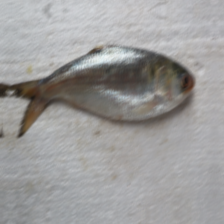

In [17]:
data[0]

In [18]:
type(data[0])

numpy.ndarray

In [19]:
data[0].shape

(224, 224, 3)

In [20]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [21]:
type(X)

numpy.ndarray

In [22]:
type(Y)

numpy.ndarray

In [23]:
print(X.shape)
print(Y.shape)

(15000, 224, 224, 3)
(15000,)


In [24]:
print(Y)

[0 0 0 ... 2 2 2]


**Train Test Split**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 224, 224, 3) (12000, 224, 224, 3) (3000, 224, 224, 3)


In [27]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[181, 186, 205],
        [143, 148, 167],
        [170, 175, 195],
        ...,
        [196, 204, 225],
        [199, 207, 228],
        [188, 194, 216]],

       [[180, 185, 207],
        [172, 177, 197],
        [172, 177, 197],
        ...,
        [206, 214, 235],
        [202, 210, 231],
        [198, 204, 226]],

       [[174, 179, 199],
        [180, 183, 202],
        [173, 178, 198],
        ...,
        [208, 216, 237],
        [207, 215, 236],
        [199, 207, 228]],

       ...,

       [[164, 170, 192],
        [162, 168, 190],
        [172, 178, 200],
        ...,
        [137, 145, 164],
        [133, 141, 162],
        [133, 141, 162]],

       [[172, 178, 200],
        [163, 169, 191],
        [176, 182, 206],
        ...,
        [136, 144, 165],
        [133, 141, 162],
        [128, 138, 157]],

       [[168, 173, 193],
        [168, 174, 196],
        [180, 184, 211],
        ...,
        [136, 144, 165],
        [126, 134, 153],
        [123, 128, 134]]], dtype=uint8)
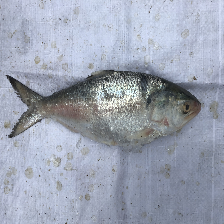

In [28]:
X_train[0]

#CNN

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, r2_score
import seaborn as sns

# Build a CNN model
input_shape = X_train_scaled.shape[1:]  # Dynamically set input shape

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')  # Adjust for the number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_scaled, Y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)

# Predictions
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Accuracy
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5859 - loss: 1.0731
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9057 - loss: 0.2520
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9391 - loss: 0.1713
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9569 - loss: 0.1149
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9588 - loss: 0.1065
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9773 - loss: 0.0605
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9803 - loss: 0.0610
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9868 - loss: 0.0446
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9887 - loss: 0.0317
Epoch 10/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9918 - loss: 0.0253
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Train Accuracy: 0.9956
Test Accuracy: 0.9619


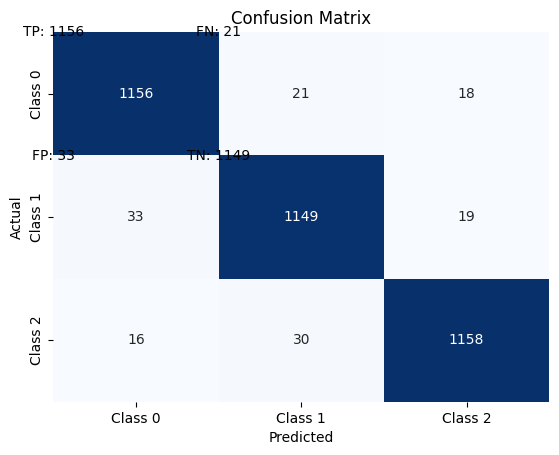

In [30]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Class 0", "Class 1", "Class 2"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Class 0", "Class 1", "Class 2"])
plt.text(0, 0, f"TP: {cm[0, 0]}", ha='center', va='center', color='black')
plt.text(1, 0, f"FN: {cm[0, 1]}", ha='center', va='center', color='black')
plt.text(0, 1, f"FP: {cm[1, 0]}", ha='center', va='center', color='black')
plt.text(1, 1, f"TN: {cm[1, 1]}", ha='center', va='center', color='black')
plt.show()


In [31]:
# F1 Score
f1 = f1_score(Y_test, Y_test_pred, average='weighted')
print(f"F1 Score (Weighted): {f1:.4f}")

F1 Score (Weighted): 0.9619


In [32]:
# R2 Score
# R2 is calculated based on probabilities
r2 = r2_score(Y_test, Y_test_pred_prob.argmax(axis=1))
print(f"R2 Score: {r2:.4f}")


R2 Score: 0.9004


In [33]:
# Save the model
model.save("cnn_model.h5")
print("Model saved as cnn_model.h5")

Model saved as cnn_model.h5


In [37]:
model.save("cnn.h5")

#Resnet-50

Epoch 1/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 92s 78ms/step - accuracy: 0.7176 - loss: 0.7068 - val_accuracy: 0.3285 - val_loss: 1.5633
Epoch 2/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.8619 - loss: 0.3592 - val_accuracy: 0.3285 - val_loss: 4.2695
Epoch 3/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9018 - loss: 0.2743 - val_accuracy: 0.7642 - val_loss: 0.8478
Epoch 4/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9181 - loss: 0.2213 - val_accuracy: 0.9271 - val_loss: 0.1999
Epoch 5/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.9451 - loss: 0.1465 - val_accuracy: 0.7545 - val_loss: 0.8004
Epoch 6/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9584 - loss: 0.1223 - val_accuracy: 0.7406 - val_loss: 0.8244
Epoch 7/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9692 - loss: 0.0953 - val_accuracy: 0.9681 - val_loss: 0.0997
Epoch 8/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9731 - loss: 0.0775 - 

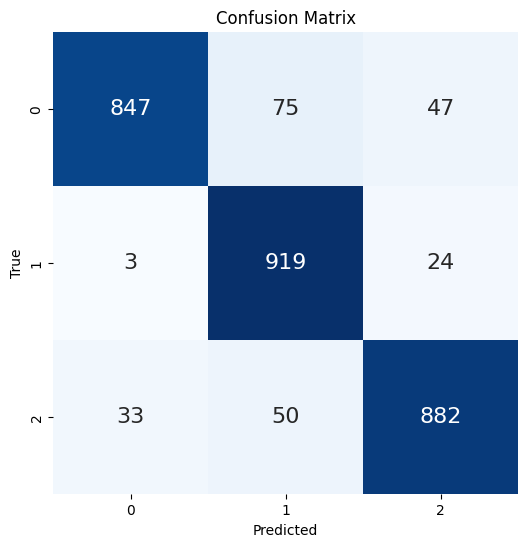

Test Accuracy: 0.9194
F1 Score: 0.9193
Accuracy Score: 0.9194


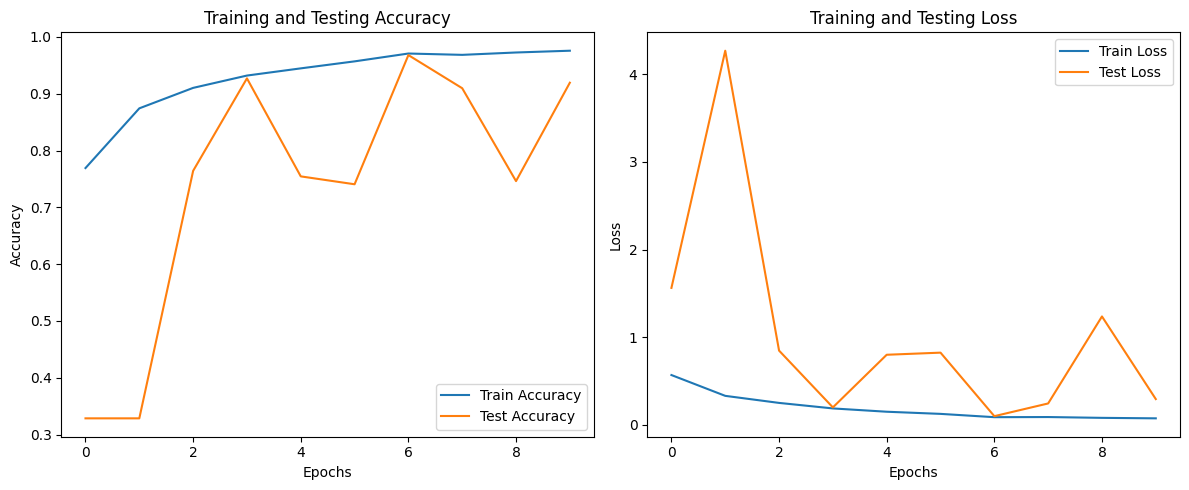

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split

# Example Data Preprocessing (you should replace this with your actual dataset)
# X_train_scaled, Y_train = load_your_data()

# Function to display confusion matrix
def display_confusion_matrix(cm, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Build ResNet model with additional CNN layers
input_shape = (224, 224, 3)

# Base ResNet model (exclude top classification layers)
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
x = base_model_resnet.output

# Add CNN layers on top of ResNet
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)

# Add fully connected layers
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # Adjust for the number of classes

# Create the final model
model = Model(inputs=base_model_resnet.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train/test split (you should already have a dataset, replace this with actual data)
X_train, X_test, Y_train, Y_test = train_test_split(X_train_scaled, Y_train, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

# Predictions for confusion matrix and metrics
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_classes)
display_confusion_matrix(cm, title="Confusion Matrix")

# F1 Score and Accuracy
f1 = f1_score(Y_test, Y_pred_classes, average='weighted')
accuracy = accuracy_score(Y_test, Y_pred_classes)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy Score: {accuracy:.4f}")

# Plot Training and Testing Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
model.save('resnet_cnn_model.h5')


#Resnet50

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

Starting Fold 1
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.3794 - loss: 1.2115 - val_accuracy: 0.4931 - val_loss: 1.0377
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.4582 - loss: 1.0274 - val_accuracy: 0.5108 - val_loss: 0.9878
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5193 - loss: 0.9768 - val_accuracy: 0.6389 - val_loss: 0.9101
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5635 - loss: 0.9345 - val_accuracy: 0.6156 - val_loss: 0.8936
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5776 - loss: 0.9152 - val_accuracy: 0.5177 - val_loss: 0.9171
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


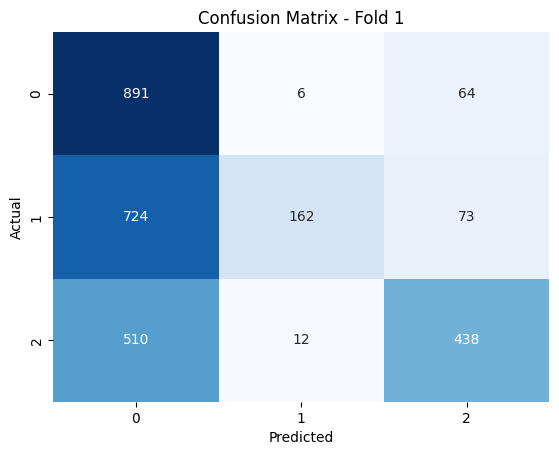

Fold 1 - F1 Score: 0.4776
Fold 1 - R² Score: -0.6195

Starting Fold 2
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.5888 - loss: 0.8971 - val_accuracy: 0.5677 - val_loss: 0.8612
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5937 - loss: 0.8751 - val_accuracy: 0.4722 - val_loss: 0.9863
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6132 - loss: 0.8570 - val_accuracy: 0.5434 - val_loss: 1.0129
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6209 - loss: 0.8451 - val_accuracy: 0.6774 - val_loss: 0.7481
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6317 - loss: 0.8289 - val_accuracy: 0.7038 - val_loss: 0.7139
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


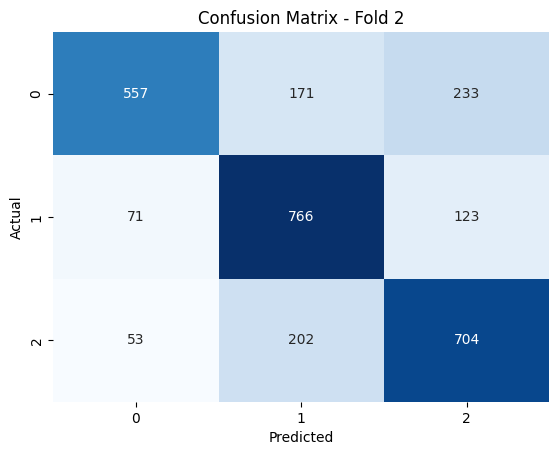

Fold 2 - F1 Score: 0.7019
Fold 2 - R² Score: 0.1089

Starting Fold 3
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6454 - loss: 0.7997 - val_accuracy: 0.6816 - val_loss: 0.7467
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6603 - loss: 0.7774 - val_accuracy: 0.7007 - val_loss: 0.7090
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6577 - loss: 0.7835 - val_accuracy: 0.7049 - val_loss: 0.6993
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6578 - loss: 0.7701 - val_accuracy: 0.5792 - val_loss: 0.9835
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6676 - loss: 0.7568 - val_accuracy: 0.6736 - val_loss: 0.7363
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


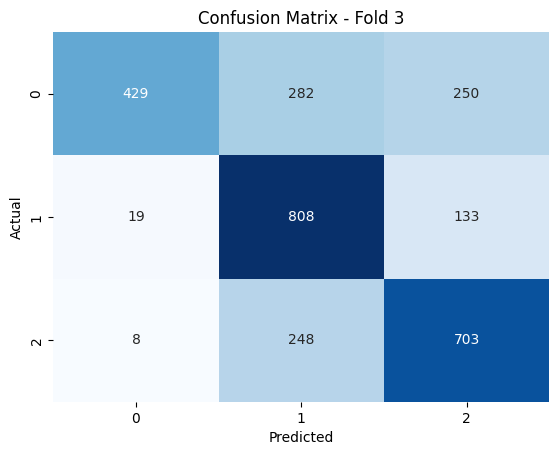

Fold 3 - F1 Score: 0.6654
Fold 3 - R² Score: 0.1073

Starting Fold 4
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.6869 - loss: 0.7334 - val_accuracy: 0.6896 - val_loss: 0.7232
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6796 - loss: 0.7388 - val_accuracy: 0.7337 - val_loss: 0.6481
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6884 - loss: 0.7170 - val_accuracy: 0.7434 - val_loss: 0.6382
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6930 - loss: 0.7035 - val_accuracy: 0.6389 - val_loss: 0.7681
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6950 - loss: 0.7120 - val_accuracy: 0.7469 - val_loss: 0.6116
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


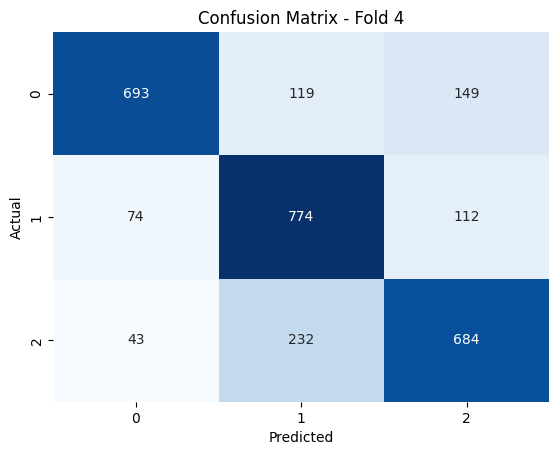

Fold 4 - F1 Score: 0.7479
Fold 4 - R² Score: 0.3203

Starting Fold 5
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.7069 - loss: 0.6835 - val_accuracy: 0.7406 - val_loss: 0.6234
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7003 - loss: 0.6933 - val_accuracy: 0.7115 - val_loss: 0.6559
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7169 - loss: 0.6708 - val_accuracy: 0.7580 - val_loss: 0.5853
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7054 - loss: 0.6760 - val_accuracy: 0.7260 - val_loss: 0.6327
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7132 - loss: 0.6742 - val_accuracy: 0.7288 - val_loss: 0.6267
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


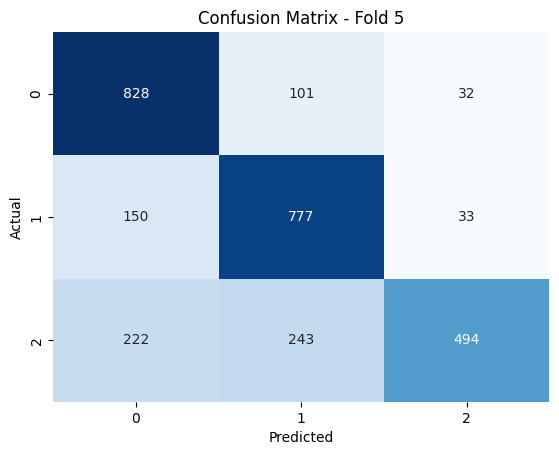

Fold 5 - F1 Score: 0.7213
Fold 5 - R² Score: 0.1964


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, r2_score
import seaborn as sns

# Initialize ResNet model with transfer learning
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # Adjust number of classes as needed
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, Y_train)):
    print(f"\nStarting Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train the model
    history = model.fit(X_train_fold, Y_train_fold,
                        validation_data=(X_val_fold, Y_val_fold),
                        epochs=5,  # Adjust epochs as needed
                        batch_size=32,
                        verbose=1)

    # Evaluate the model
    train_loss, train_accuracy = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_loss, val_accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    # Predict on validation data
    val_predictions_prob = model.predict(X_val_fold)
    val_predictions = np.argmax(val_predictions_prob, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(Y_val_fold, val_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # F1 Score
    f1 = f1_score(Y_val_fold, val_predictions, average='weighted')
    print(f"Fold {fold + 1} - F1 Score: {f1:.4f}")

    # R² Score
    r2 = r2_score(Y_val_fold, np.argmax(val_predictions_prob, axis=1))
    print(f"Fold {fold + 1} - R² Score: {r2:.4f}")

    # Save fold results
    kfold_results.append({
        'fold': fold + 1,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'f1_score': f1,
        'r2_score': r2,
        'confusion_matrix': cm
    })

In [39]:

# Print overall results
for result in kfold_results:
    print(f"\nFold {result['fold']}:")
    print(f"  Train Accuracy: {result['train_accuracy']:.4f}")
    print(f"  Validation Accuracy: {result['val_accuracy']:.4f}")
    print(f"  F1 Score: {result['f1_score']:.4f}")
    print(f"  R² Score: {result['r2_score']:.4f}")


Fold 1:
  Train Accuracy: 0.5182
  Validation Accuracy: 0.5177
  F1 Score: 0.4776
  R² Score: -0.6195

Fold 2:
  Train Accuracy: 0.6928
  Validation Accuracy: 0.7038
  F1 Score: 0.7019
  R² Score: 0.1089

Fold 3:
  Train Accuracy: 0.6736
  Validation Accuracy: 0.6736
  F1 Score: 0.6654
  R² Score: 0.1073

Fold 4:
  Train Accuracy: 0.7474
  Validation Accuracy: 0.7469
  F1 Score: 0.7479
  R² Score: 0.3203

Fold 5:
  Train Accuracy: 0.7307
  Validation Accuracy: 0.7288
  F1 Score: 0.7213
  R² Score: 0.1964


In [40]:
# Save the trained model
model.save("resnet_stratified_kfold.h5")
print("Model saved as resnet_stratified_kfold.h5")

Model saved as resnet_stratified_kfold.h5


#EfficientNetB0

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Starting Fold 1
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.3345 - loss: 1.1001 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3466 - loss: 1.0985 - val_accuracy: 0.3330 - val_loss: 1.0988
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3443 - loss: 1.0983 - val_accuracy: 0.3330 - val_loss: 1.0986
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3364 - loss: 1.0989 - val_accuracy: 0.3330 - val_loss: 1.0987
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3366 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0986
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step


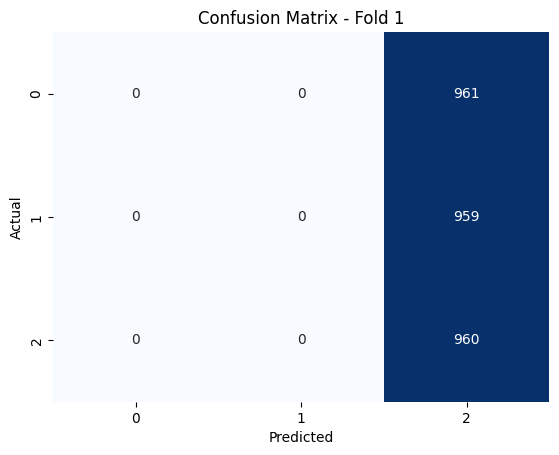

Fold 1 - F1 Score: 0.1667
Fold 1 - R² Score: -1.5003

Starting Fold 2
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.3257 - loss: 1.0988 - val_accuracy: 0.3330 - val_loss: 1.0986
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3307 - loss: 1.0987 - val_accuracy: 0.3330 - val_loss: 1.0986
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3318 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3308 - loss: 1.0987 - val_accuracy: 0.3337 - val_loss: 1.0986
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3269 - loss: 1.0987 - val_accuracy: 0.3330 - val_loss: 1.0986
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


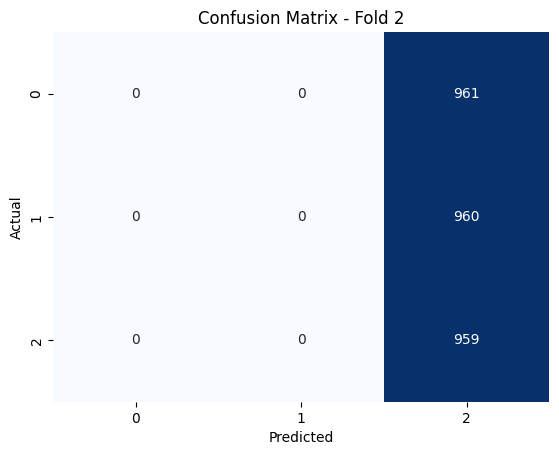

Fold 2 - F1 Score: 0.1664
Fold 2 - R² Score: -1.5021

Starting Fold 3
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.3295 - loss: 1.0987 - val_accuracy: 0.3330 - val_loss: 1.0986
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3241 - loss: 1.0987 - val_accuracy: 0.3337 - val_loss: 1.0986
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3290 - loss: 1.0986 - val_accuracy: 0.3330 - val_loss: 1.0986
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3294 - loss: 1.0987 - val_accuracy: 0.3330 - val_loss: 1.0986
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3346 - loss: 1.0987 - val_accuracy: 0.3337 - val_loss: 1.0986
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


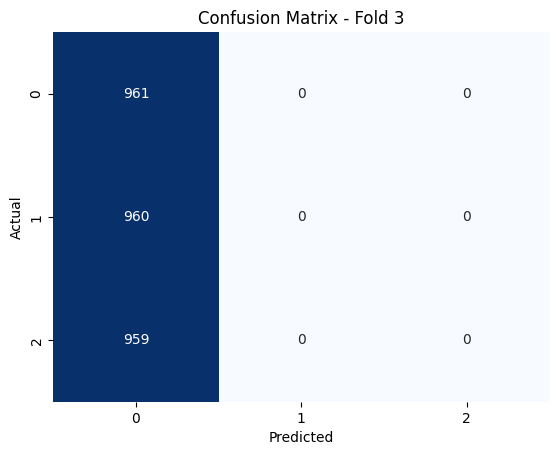

Fold 3 - F1 Score: 0.1670
Fold 3 - R² Score: -1.4979

Starting Fold 4
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.3371 - loss: 1.0986 - val_accuracy: 0.3330 - val_loss: 1.0987
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3292 - loss: 1.0987 - val_accuracy: 0.3330 - val_loss: 1.0986
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3233 - loss: 1.0987 - val_accuracy: 0.3337 - val_loss: 1.0986
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3377 - loss: 1.0987 - val_accuracy: 0.3330 - val_loss: 1.0986
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3396 - loss: 1.0987 - val_accuracy: 0.3330 - val_loss: 1.0987
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


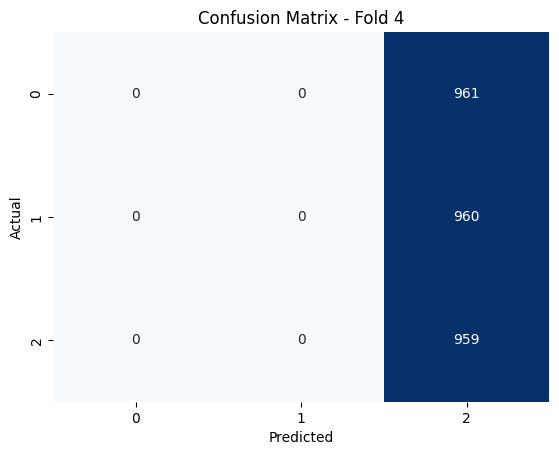

Fold 4 - F1 Score: 0.1664
Fold 4 - R² Score: -1.5021

Starting Fold 5
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.3263 - loss: 1.0986 - val_accuracy: 0.3337 - val_loss: 1.0986
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3306 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3295 - loss: 1.0987 - val_accuracy: 0.3337 - val_loss: 1.0986
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3380 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3320 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0986
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


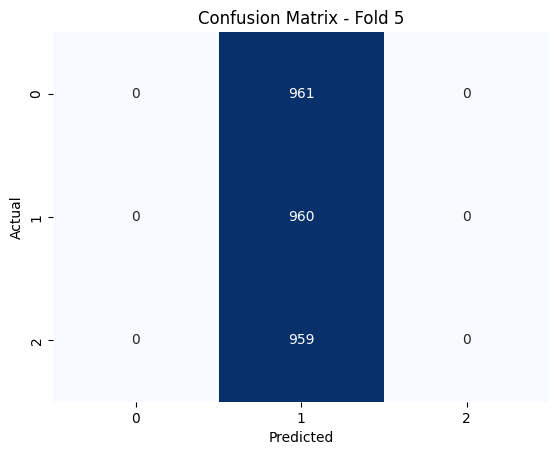

Fold 5 - F1 Score: 0.1667
Fold 5 - R² Score: -0.0000
Model saved as efficientnet_stratified_kfold.h5

Fold 1:
  Train Accuracy: 0.3330
  Validation Accuracy: 0.3333
  F1 Score: 0.1667
  R² Score: -1.5003

Fold 2:
  Train Accuracy: 0.3331
  Validation Accuracy: 0.3330
  F1 Score: 0.1664
  R² Score: -1.5021

Fold 3:
  Train Accuracy: 0.3337
  Validation Accuracy: 0.3337
  F1 Score: 0.1670
  R² Score: -1.4979

Fold 4:
  Train Accuracy: 0.3331
  Validation Accuracy: 0.3330
  F1 Score: 0.1664
  R² Score: -1.5021

Fold 5:
  Train Accuracy: 0.3332
  Validation Accuracy: 0.3333
  F1 Score: 0.1667
  R² Score: -0.0000


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, r2_score
import seaborn as sns

# Initialize EfficientNet model with transfer learning
input_shape = (224, 224, 3)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # Adjust for the number of classes
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, Y_train)):
    print(f"\nStarting Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train the model
    history = model.fit(X_train_fold, Y_train_fold,
                        validation_data=(X_val_fold, Y_val_fold),
                        epochs=5,  # Adjust epochs as needed
                        batch_size=32,
                        verbose=1)

    # Evaluate the model
    train_loss, train_accuracy = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_loss, val_accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    # Predict on validation data
    val_predictions_prob = model.predict(X_val_fold)
    val_predictions = np.argmax(val_predictions_prob, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(Y_val_fold, val_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # F1 Score
    f1 = f1_score(Y_val_fold, val_predictions, average='weighted')
    print(f"Fold {fold + 1} - F1 Score: {f1:.4f}")

    # R² Score
    r2 = r2_score(Y_val_fold, val_predictions)
    print(f"Fold {fold + 1} - R² Score: {r2:.4f}")

    # Save fold results
    kfold_results.append({
        'fold': fold + 1,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'f1_score': f1,
        'r2_score': r2,
        'confusion_matrix': cm
    })

# Save the trained model
model.save("efficientnet_stratified_kfold.h5")
print("Model saved as efficientnet_stratified_kfold.h5")

# Print overall results
for result in kfold_results:
    print(f"\nFold {result['fold']}:")
    print(f"  Train Accuracy: {result['train_accuracy']:.4f}")
    print(f"  Validation Accuracy: {result['val_accuracy']:.4f}")
    print(f"  F1 Score: {result['f1_score']:.4f}")
    print(f"  R² Score: {result['r2_score']:.4f}")


#Resnet+CNN


Starting Fold 1
Epoch 1/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.3735 - loss: 1.3036 - val_accuracy: 0.5225 - val_loss: 0.9529
Epoch 2/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.5358 - loss: 0.9411 - val_accuracy: 0.6579 - val_loss: 0.8020
Epoch 3/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6502 - loss: 0.8142 - val_accuracy: 0.6425 - val_loss: 0.7717
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


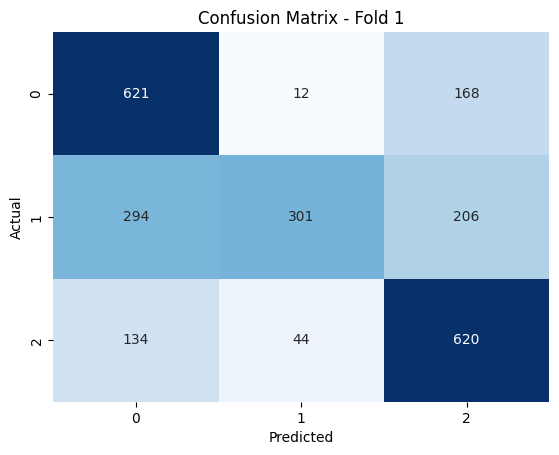

Fold 1 - F1 Score: 0.6276
Fold 1 - R² Score: -0.1032

Starting Fold 2
Epoch 1/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6795 - loss: 0.7249 - val_accuracy: 0.7738 - val_loss: 0.5490
Epoch 2/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7154 - loss: 0.6663 - val_accuracy: 0.7746 - val_loss: 0.5325
Epoch 3/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7332 - loss: 0.6236 - val_accuracy: 0.7937 - val_loss: 0.4999
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


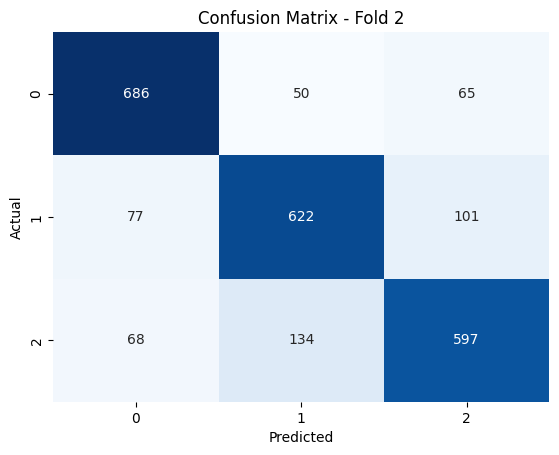

Fold 2 - F1 Score: 0.7933
Fold 2 - R² Score: 0.4412

Starting Fold 3
Epoch 1/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7476 - loss: 0.5851 - val_accuracy: 0.7875 - val_loss: 0.5494
Epoch 2/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7568 - loss: 0.5771 - val_accuracy: 0.7675 - val_loss: 0.5401
Epoch 3/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7608 - loss: 0.5579 - val_accuracy: 0.7554 - val_loss: 0.5583
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


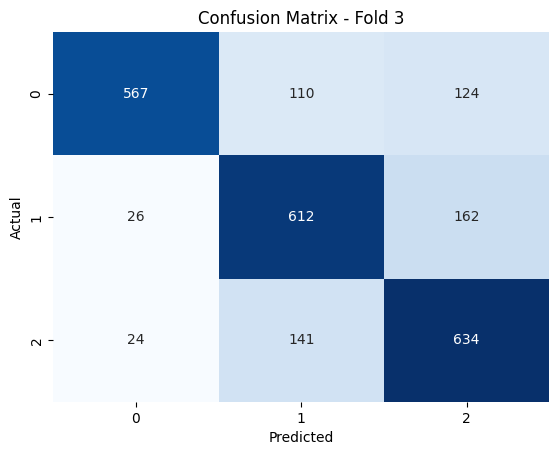

Fold 3 - F1 Score: 0.7578
Fold 3 - R² Score: 0.3556

Starting Fold 4
Epoch 1/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7614 - loss: 0.5639 - val_accuracy: 0.7954 - val_loss: 0.4733
Epoch 2/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7737 - loss: 0.5230 - val_accuracy: 0.7283 - val_loss: 0.7018
Epoch 3/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7781 - loss: 0.5229 - val_accuracy: 0.7375 - val_loss: 0.6595
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


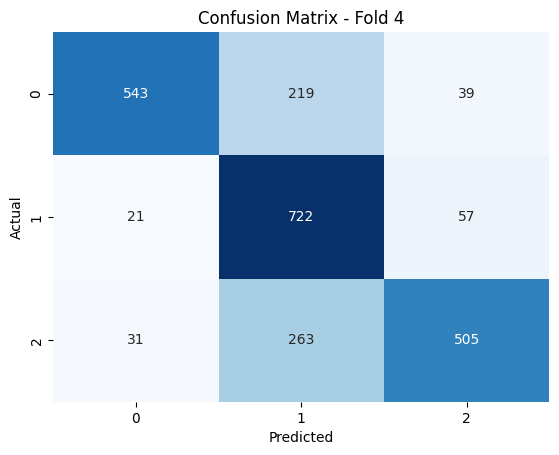

Fold 4 - F1 Score: 0.7400
Fold 4 - R² Score: 0.4750

Starting Fold 5
Epoch 1/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7859 - loss: 0.5046 - val_accuracy: 0.7729 - val_loss: 0.5312
Epoch 2/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7901 - loss: 0.4990 - val_accuracy: 0.7729 - val_loss: 0.5620
Epoch 3/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7919 - loss: 0.4842 - val_accuracy: 0.7896 - val_loss: 0.5061
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


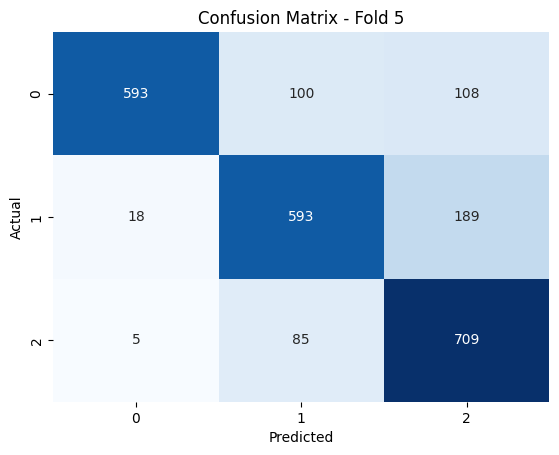

Fold 5 - F1 Score: 0.7914
Fold 5 - R² Score: 0.4725
Model saved as resnet_cnn_stratified_kfold.h5


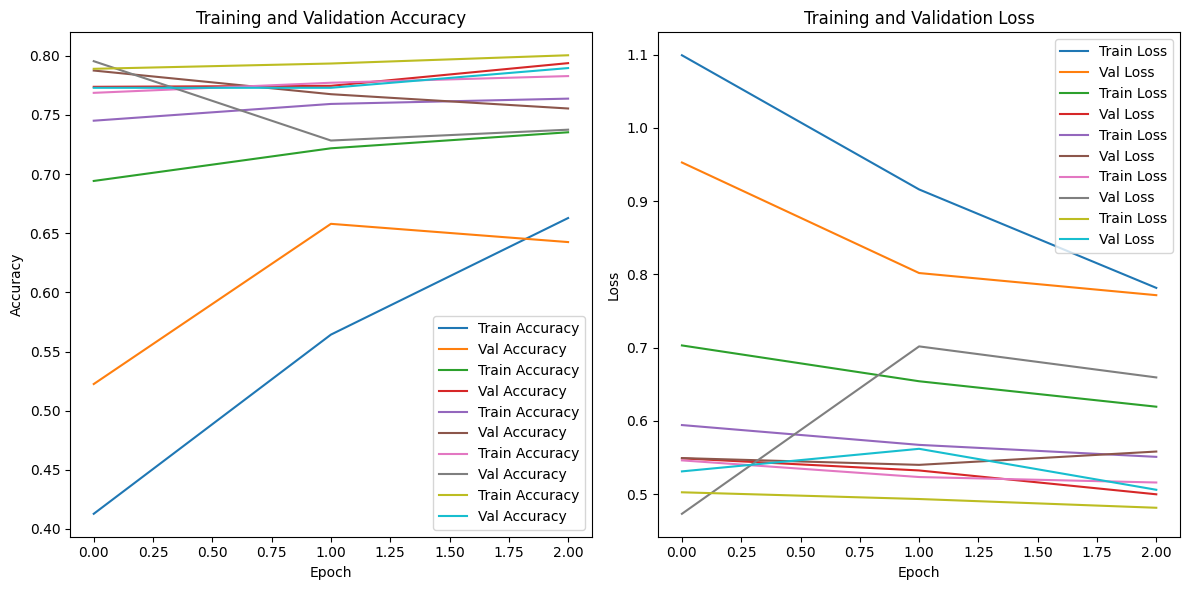


Fold 1:
  Train Accuracy: 0.6577
  Validation Accuracy: 0.6425
  F1 Score: 0.6276
  R² Score: -0.1032

Fold 2:
  Train Accuracy: 0.7834
  Validation Accuracy: 0.7937
  F1 Score: 0.7933
  R² Score: 0.4412

Fold 3:
  Train Accuracy: 0.7636
  Validation Accuracy: 0.7554
  F1 Score: 0.7578
  R² Score: 0.3556

Fold 4:
  Train Accuracy: 0.7340
  Validation Accuracy: 0.7375
  F1 Score: 0.7400
  R² Score: 0.4750

Fold 5:
  Train Accuracy: 0.8107
  Validation Accuracy: 0.7896
  F1 Score: 0.7914
  R² Score: 0.4725


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, r2_score
import seaborn as sns

# Function to display grid view of image outputs from convolutional layers
def display_grid(images, rows, cols, title="Grid View of Conv Layer Outputs"):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    fig.suptitle(title, fontsize=16)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap='viridis')
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Initialize the ResNet model with transfer learning
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a custom CNN-based head
x = base_model.output
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # Adjust for the number of classes
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = []

history_list = []  # To store history for all folds

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, Y_train)):
    print(f"\nStarting Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train the model
    history = model.fit(X_train_fold, Y_train_fold,
                        validation_data=(X_val_fold, Y_val_fold),
                        epochs=3,  # Adjust epochs as needed
                        batch_size=32,
                        verbose=1)

    # Store history for plotting later
    history_list.append(history.history)

    # Evaluate the model
    train_loss, train_accuracy = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_loss, val_accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    # Predict on validation data
    val_predictions_prob = model.predict(X_val_fold)
    val_predictions = np.argmax(val_predictions_prob, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(Y_val_fold, val_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # F1 Score
    f1 = f1_score(Y_val_fold, val_predictions, average='weighted')
    print(f"Fold {fold + 1} - F1 Score: {f1:.4f}")

    # R² Score
    r2 = r2_score(Y_val_fold, val_predictions)
    print(f"Fold {fold + 1} - R² Score: {r2:.4f}")

    # Save fold results
    kfold_results.append({
        'fold': fold + 1,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'f1_score': f1,
        'r2_score': r2,
        'confusion_matrix': cm
    })

# Save the trained model
model.save("resnet_cnn_stratified_kfold.h5")
print("Model saved as resnet_cnn_stratified_kfold.h5")

# Plot the training history
def plot_history(history_list):
    plt.figure(figsize=(12, 6))

    # Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    for history in history_list:
        plt.plot(history['accuracy'], label='Train Accuracy')
        plt.plot(history['val_accuracy'], label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training and Validation Loss
    plt.subplot(1, 2, 2)
    for history in history_list:
        plt.plot(history['loss'], label='Train Loss')
        plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_list)

# Print overall results
for result in kfold_results:
    print(f"\nFold {result['fold']}:")
    print(f"  Train Accuracy: {result['train_accuracy']:.4f}")
    print(f"  Validation Accuracy: {result['val_accuracy']:.4f}")
    print(f"  F1 Score: {result['f1_score']:.4f}")
    print(f"  R² Score: {result['r2_score']:.4f}")


#Ensemble -> Resnet+Efficient

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns
from sklearn.metrics import r2_score

# Function to display the first image
def display_image(image, title="Image at Conv Layer"):
    plt.imshow(image.astype("uint8"))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Build the ResNet model
input_shape = (224, 224, 3)

# ResNet model
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
x_resnet = base_model_resnet.output
x_resnet = GlobalAveragePooling2D()(x_resnet)
x_resnet = Dense(256, activation='relu')(x_resnet)
output_resnet = Dense(3, activation='softmax')(x_resnet)
model_resnet = Model(inputs=base_model_resnet.input, outputs=output_resnet)

# EfficientNet model
base_model_effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
x_effnet = base_model_effnet.output
x_effnet = GlobalAveragePooling2D()(x_effnet)
x_effnet = Dense(256, activation='relu')(x_effnet)
output_effnet = Dense(3, activation='softmax')(x_effnet)
model_effnet = Model(inputs=base_model_effnet.input, outputs=output_effnet)

# Compile both models
model_resnet.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_effnet.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = []

train_losses_resnet = []
test_losses_resnet = []
train_accuracies_resnet = []
test_accuracies_resnet = []

train_losses_effnet = []
test_losses_effnet = []
train_accuracies_effnet = []
test_accuracies_effnet = []

# Iterate through folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, Y_train)):
    print(f"\nStarting Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train ResNet model
    history_resnet = model_resnet.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=5,  # Add the number of epochs here
        batch_size=32,
        verbose=1
    )

    # Train EfficientNet model
    history_effnet = model_effnet.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=10,  # Add the number of epochs here
        batch_size=32,
        verbose=1
    )

    # Visualize the results for ResNet model
    train_losses_resnet.append(history_resnet.history['loss'])
    test_losses_resnet.append(history_resnet.history['val_loss'])
    train_accuracies_resnet.append(history_resnet.history['accuracy'])
    test_accuracies_resnet.append(history_resnet.history['val_accuracy'])

    # Visualize the results for EfficientNet model
    train_losses_effnet.append(history_effnet.history['loss'])
    test_losses_effnet.append(history_effnet.history['val_loss'])
    train_accuracies_effnet.append(history_effnet.history['accuracy'])
    test_accuracies_effnet.append(history_effnet.history['val_accuracy'])

    # Evaluate models on validation data
    val_predictions_resnet = model_resnet.predict(X_val_fold)
    val_predictions_classes_resnet = np.argmax(val_predictions_resnet, axis=1)

    val_predictions_effnet = model_effnet.predict(X_val_fold)
    val_predictions_classes_effnet = np.argmax(val_predictions_effnet, axis=1)

    # Confusion matrix for ResNet
    cm_resnet = confusion_matrix(Y_val_fold, val_predictions_classes_resnet)
    sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for ResNet - Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Confusion matrix for EfficientNet
    cm_effnet = confusion_matrix(Y_val_fold, val_predictions_classes_effnet)
    sns.heatmap(cm_effnet, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for EfficientNet - Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # F1 Score and Accuracy for ResNet
    f1_resnet = f1_score(Y_val_fold, val_predictions_classes_resnet, average='weighted')
    accuracy_resnet = accuracy_score(Y_val_fold, val_predictions_classes_resnet)
    print(f"ResNet - Fold {fold + 1} - F1 Score: {f1_resnet:.4f}, Accuracy: {accuracy_resnet:.4f}")

    # F1 Score and Accuracy for EfficientNet
    f1_effnet = f1_score(Y_val_fold, val_predictions_classes_effnet, average='weighted')
    accuracy_effnet = accuracy_score(Y_val_fold, val_predictions_classes_effnet)
    print(f"EfficientNet - Fold {fold + 1} - F1 Score: {f1_effnet:.4f}, Accuracy: {accuracy_effnet:.4f}")

    # Store results
    kfold_results.append({
        'fold': fold + 1,
        'f1_score_resnet': f1_resnet,
        'accuracy_resnet': accuracy_resnet,
        'f1_score_effnet': f1_effnet,
        'accuracy_effnet': accuracy_effnet,
        'cm_resnet': cm_resnet,
        'cm_effnet': cm_effnet
    })

# Plot history of loss and accuracy for both models
plt.figure(figsize=(14, 6))

# ResNet Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(np.mean(train_losses_resnet, axis=0), label="Train Loss")
plt.plot(np.mean(test_losses_resnet, axis=0), label="Test Loss")
plt.title('ResNet Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# EfficientNet Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(np.mean(train_losses_effnet, axis=0), label="Train Loss")
plt.plot(np.mean(test_losses_effnet, axis=0), label="Test Loss")
plt.title('EfficientNet Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plot accuracy graph
plt.figure(figsize=(14, 6))

# ResNet Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(np.mean(train_accuracies_resnet, axis=0), label="Train Accuracy")
plt.plot(np.mean(test_accuracies_resnet, axis=0), label="Test Accuracy")
plt.title('ResNet Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# EfficientNet Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(np.mean(train_accuracies_effnet, axis=0), label="Train Accuracy")
plt.plot(np.mean(test_accuracies_effnet, axis=0), label="Test Accuracy")
plt.title('EfficientNet Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Save the models
model_resnet.save('resnet_model.h5')
model_effnet.save('effnet_model.h5')

# Print overall results
for result in kfold_results:
    print(f"Fold {result['fold']} - ResNet F1 Score: {result['f1_score_resnet']:.4f}, Accuracy: {result['accuracy_resnet']:.4f}")
    print(f"Fold {result['fold']} - EfficientNet F1 Score: {result['f1_score_effnet']:.4f}, Accuracy: {result['accuracy_effnet']:.4f}")



Starting Fold 1
Epoch 1/5


#End